# 📌 Building a Traffic Prediction MLOps Pipeline with Low-Code ML & AutoML Using PyCaret

## **Lab Description**
This lab demonstrates how to **train, tune, and save a machine learning model** using **PyCaret**, a low-code machine learning library. The goal is to build a **traffic volume prediction model** based on weather conditions, rush hours, and other influencing factors.

PyCaret simplifies the process of **model selection, training, and hyperparameter tuning**, allowing for efficient machine learning implementation with minimal coding. By the end of the lab, we will have a **fully trained model** that can predict traffic volume and can be saved and reused for future predictions.

---

## **Lab Scenario**
You are a data scientist working for the **City Traffic Management Department**. Her task is to develop a **machine learning model** that can predict **traffic volume** based on various factors such as:

✔️ **Temperature**  
✔️ **Rainfall/Snowfall**  
✔️ **Cloud coverage**  
✔️ **Rush hour indicators**  
✔️ **Weather type (Clear, Rainy, Cloudy, etc.)**  

### **💡 Goal:**  
The **goal** is to **help city planners** make data-driven decisions, such as:  
🔹 **Predicting congestion levels** to optimize traffic signals 🚦  
🔹 **Improving public transport schedules** based on traffic patterns 🚌  
🔹 **Reducing air pollution** by forecasting traffic-heavy areas 🌍  

To achieve this, You are using **PyCaret**, which allows her to quickly compare different machine learning models, fine-tune the best one, and save it for later use.

---

#### **What is PyCaret?**  

**PyCaret** is an **open-source, low-code** machine learning library in Python that automates the process of building and deploying machine learning models. It **reduces the amount of code** needed to train models and makes **ML model development much easier and faster**.  

Instead of manually writing hundreds of lines of code to preprocess data, compare models, tune hyperparameters, and deploy models, **PyCaret does all of this in just a few lines**.  



---


##### **Step 1: Install PyCaret**
- The first step involves installing **PyCaret**, which is required to run the machine learning models.  
- PyCaret is a library that automates various ML processes like preprocessing, training, and tuning.

In [ ]:
!pip install --pre pycaret

**Restart the kernal after above step** ⏫

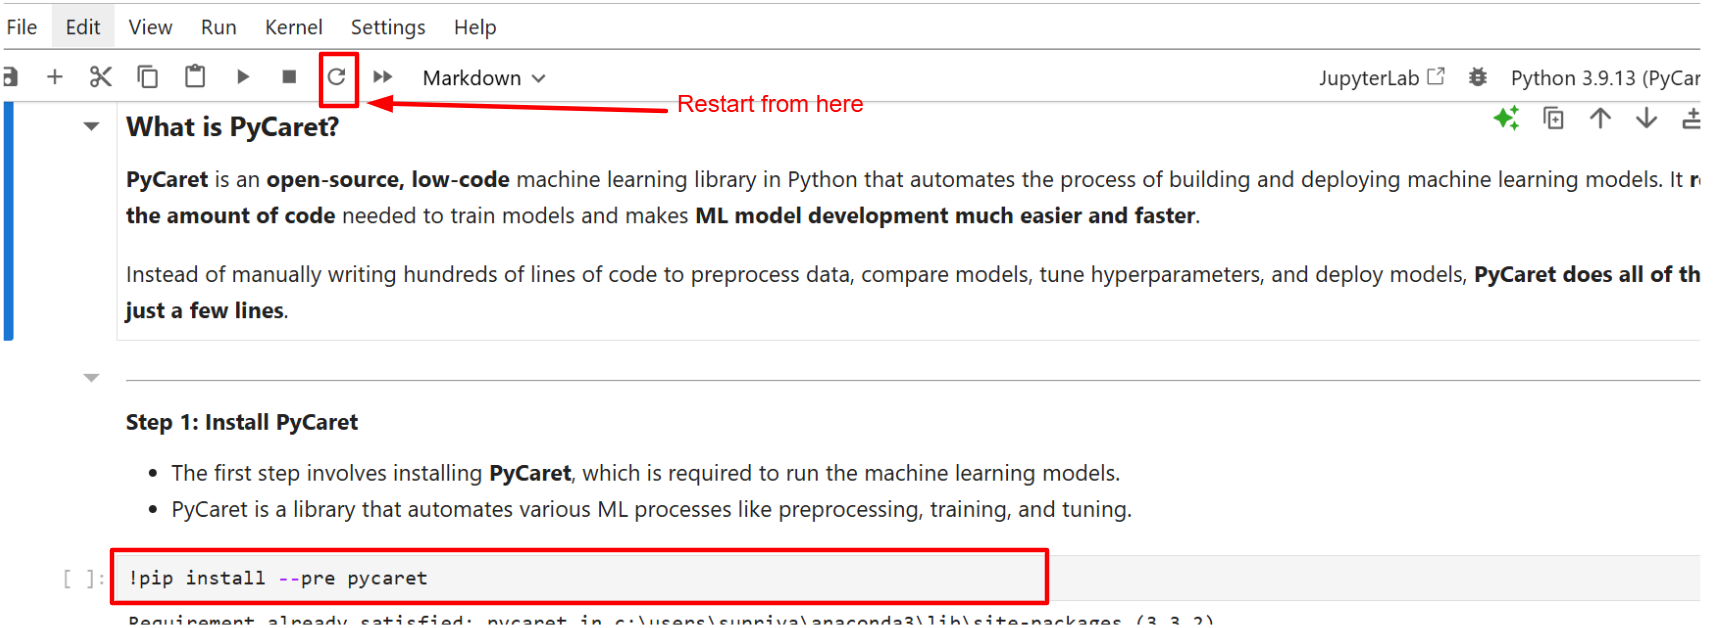

#### **Step 2: Load the Traffic Dataset**
- PyCaret provides built-in datasets, and here we use the **traffic dataset** to train our model.  
- This dataset includes details such as **weather conditions, rush hour data, and traffic volume**.

In [ ]:
from pycaret.datasets import get_data
data1 = get_data(dataset = 'traffic')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,1,5545
1,NaN,289.36,0.0,0.0,75,Clouds,0,4516
2,NaN,289.58,0.0,0.0,90,Clouds,0,4767
3,NaN,290.13,0.0,0.0,90,Clouds,0,5026
4,NaN,291.14,0.0,0.0,75,Clouds,0,4918


### **Step 2: Load the Traffic Dataset**
This step loads the **traffic dataset**, which contains real-world traffic volume data along with weather conditions.

**Why is this important?**  
- Provides the dataset required to train a regression model.  
- Includes key features like **temperature, rain, snow, and cloud cover** that affect traffic.  
- Helps in predicting future traffic patterns based on past data.  


In [ ]:
from pycaret.regression import *

### **Step 3: Set Up the Machine Learning Environment**
This initializes PyCaret’s **regression environment**, automatically handling data preprocessing.

**What happens in this step?**  
- **Identifies the target variable** (`traffic_volume`) that we want to predict.  
- **Handles missing values** by either filling them or removing them.  
- **Encodes categorical features** (e.g., converting "Cloudy" into numerical form).  
- **Scales numeric features** for better model performance.  
- Sets a **random seed (`session_id=438`)** for consistent results.  


In [ ]:
dataset = setup(data=data1, target='traffic_volume', session_id=438)

,Description,Value
0,Session id,438
1,Target,traffic_volume
2,Target type,Regression
3,Original data shape,"(48204, 8)"
4,Transformed data shape,"(48204, 28)"
5,Transformed train set shape,"(33742, 28)"
6,Transformed test set shape,"(14462, 28)"
7,Numeric features,5
8,Categorical features,2
9,Rows with missing values,99.9%


#### **Step 4: Compare Different Machine Learning Models**
- PyCaret automatically **compares multiple ML models** and selects the best-performing one.  
- Instead of manually testing different algorithms, PyCaret evaluates them and picks the best based on accuracy.

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1486.0287,3069799.6509,1751.9876,0.2207,0.9235,2.4047,0.6990
lightgbm,Light Gradient Boosting Machine,1502.9547,3079513.6446,1754.7529,0.2183,0.9296,2.4701,0.8450
gbr,Gradient Boosting Regressor,1531.0211,3150013.9560,1774.7161,0.2004,0.9422,2.5583,2.5330
ada,AdaBoost Regressor,1577.2863,3282090.0319,1811.5740,0.1669,0.9730,2.7074,1.0380
knn,K Neighbors Regressor,1573.6762,3662855.0418,1913.7557,0.0702,0.9601,2.5601,0.8900
rf,Random Forest Regressor,1547.2748,3741181.5363,1933.9648,0.0502,0.9554,2.4877,10.7410
omp,Orthogonal Matching Pursuit,1712.8788,3848922.2942,1961.8288,0.0229,1.0224,2.9640,0.1730
dummy,Dummy Regressor,1743.7632,3939897.8403,1984.8734,-0.0001,1.0318,2.9022,0.1530
et,Extra Trees Regressor,1678.7005,4588616.2268,2141.9299,-0.1650,1.0480,2.6702,7.5240
dt,Decision Tree Regressor,1746.3217,5206293.5785,2281.4939,-0.3218,1.1239,2.5748,0.3640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### **Step 5: Tune the Best Model for Better Accuracy**
This step **optimizes the model’s hyperparameters** for better performance.

**Why is this important?**  
- Adjusts settings like **learning rate, number of estimators, and tree depth**.  
- Ensures the model performs better on **both training and unseen data**.  
- Increases the accuracy of predictions.  


In [ ]:
tuned_best = tune_model(estimator = best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1490.3054,3061569.0259,1749.7340,0.2117,0.9331,5.0053
1,1520.1414,3150344.7758,1774.9211,0.2030,0.9396,2.7265
2,1499.9276,3085576.1753,1756.5808,0.2226,0.9353,2.2002
3,1493.9599,3084641.7898,1756.3148,0.2128,0.9265,3.1083
4,1509.0597,3112668.3918,1764.2756,0.2302,0.9286,1.7668
5,1490.7023,3057320.6982,1748.5196,0.2139,0.9282,2.2817
6,1461.7845,2943290.1647,1715.6020,0.2431,0.9033,1.4892
7,1513.2775,3144289.8509,1773.2146,0.1940,0.9365,2.3216
8,1526.8819,3194609.5531,1787.3471,0.1873,0.9340,1.5868


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### **Step 6: Finalize the Best Model**
Once we have the best-tuned model, this step **finalizes it for deployment**.

**Why is this important?**  
- Ensures the model is fully trained and **ready to use**.  
- Prevents further changes and **locks in the best version**.  

In [ ]:
final_model = finalize_model(estimator = tuned_best)

### **Step 7: Save the Model for Future Use**
Saves the trained model to a **file**, making it reusable without retraining.

**Why is this important?**  
- Saves time by avoiding **retraining the model from scratch**.  
- Allows the model to be **used later** for predictions.  
- Stores the model as a `.pkl` file (`rf_base_traffic.pkl`).  


In [ ]:
save_model(final_model, 'rf_base_traffic')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'rain_1h', 'snow_1h',
                                              'clouds_all', 'Rush Hour'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['holiday', 'weather_main'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(inclu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_le

### **Step 8: Load the Saved Model**
Loads the **previously saved model**, so it can be used without retraining.

**Why is this important?**  
- Avoids repeating the training process, saving time and resources.  
- Allows quick deployment of the model for real-world use.  


In [ ]:
saved_model = load_model('rf_base_traffic')

Transformation Pipeline and Model Successfully Loaded


### **Step 9: Make Predictions on New Data**
Uses the trained model to **predict traffic volume** based on new input data.

**Why is this important?**  
- Applies the model to **real-world traffic scenarios**.  
- Helps in predicting **the number of vehicles on the road** under different conditions.  
- Can be used for **traffic management and planning**.  

In [ ]:
predictions = saved_model.predict(new_data)

#### **Step 10: Create a New Dataset for Prediction**
This step creates a **new dataset** (`new_data`) that will be used for making predictions with the trained model.

#### **Why is this Important?**  
- **Real-world use:** Tests the model on unseen data to ensure practical application.  
- **Data consistency:** Ensures input format matches the training data for accurate predictions.  
- **Model generalization:** Checks if the model performs well on new conditions, not just training data.  
- **Decision-making:** Helps in traffic management, public transport scheduling, and city planning.  
- **Performance testing:** Identifies if the model needs further tuning or retraining.  


In [ ]:
import pandas as pd

new_data = pd.DataFrame({
    'holiday': [None, None, None, None, None],  # If the original dataset had holidays
    'temp': [288.28, 289.36, 289.58, 290.13, 291.14],  # Temperature values
    'rain_1h': [0.0, 0.0, 0.0, 0.0, 0.0],  # Rain in the last hour
    'snow_1h': [0.0, 0.0, 0.0, 0.0, 0.0],  # Snow in the last hour
    'clouds_all': [40, 75, 90, 90, 75],  # Cloud percentage
    'weather_main': ['Clouds', 'Clouds', 'Clouds', 'Clouds', 'Clouds'],  # Weather condition
    'Rush Hour': [1, 0, 0, 0, 0]  # Indicator for rush hour
})

# Display the DataFrame
print(new_data)



  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  Rush Hour
0    None  288.28      0.0      0.0          40       Clouds          1
1    None  289.36      0.0      0.0          75       Clouds          0
2    None  289.58      0.0      0.0          90       Clouds          0
3    None  290.13      0.0      0.0          90       Clouds          0
4    None  291.14      0.0      0.0          75       Clouds          0


In this step
it **saved_model** is your trained model.
**predict_model(saved_model, data=new_data)** applies the model to the new data.
This gives predictions for how much traffic volume we can expect for each row in **new_data**

#### **Step 11: Make Predictions on New Data**
This step uses the trained model to predict **traffic volume** based on new input data.

#### **What happens in this step?**  
- `predict_model(saved_model, data=new_data)` applies the trained model to `new_data` and generates predictions.  
- `predictions.head()` displays the first few rows of the predicted results.  



In [ ]:
predictions = predict_model(saved_model, data=new_data)
predictions.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,prediction_label
0,NaN,288.279999,0.0,0.0,40,Clouds,1,4633.113770
1,NaN,289.359985,0.0,0.0,75,Clouds,0,3285.329102
2,NaN,289.579987,0.0,0.0,90,Clouds,0,3202.917236
3,NaN,290.130005,0.0,0.0,90,Clouds,0,3072.800049
4,NaN,291.140015,0.0,0.0,75,Clouds,0,3251.032715


from matplotlib import pyplot as plt
_df_0['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['clouds_all'].plot(kind='hist', bins=20, title='clouds_all')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rush Hour'].plot(kind='hist', bins=20, title='Rush Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['prediction_label'].plot(kind='hist', bins=20, title='prediction_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='temp', y='clouds_all', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='clouds_all', y='Rush Hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rush Hour', y='prediction_label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['temp']
  ys = series['clouds_all']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('temp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('temp')
_ = plt.ylabel('clouds_all')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['temp']
  ys = series['Rush Hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('temp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('temp')
_ = plt.ylabel('Rush Hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['temp']
  ys = series['prediction_label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('temp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('temp')
_ = plt.ylabel('prediction_label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['temp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'temp'}, axis=1)
              .sort_values('temp', ascending=True))
  xs = counted['temp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('temp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('temp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['clouds_all'].plot(kind='line', figsize=(8, 4), title='clouds_all')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rush Hour'].plot(kind='line', figsize=(8, 4), title='Rush Hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['prediction_label'].plot(kind='line', figsize=(8, 4), title='prediction_label')
plt.gca().spines[['top', 'right']].set_visible(False)

✅ **Why Do We Create New Data If We Already Loaded a Dataset? 🤔**

When we load the dataset using:
`data1 = get_data('traffic')`
we are getting past traffic data. This dataset is used to train the machine learning model to learn patterns.

**But Why Do We Create New Data?**

After training, we need to test the model on new, unseen data to check its accuracy.

##### **Key Differences:**
- Loading the dataset → Training the model with past data.
- Creating new data → Testing the model on new situations.